In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import r2_score

import itertools

from pmdarima import auto_arima

from pandas.tseries.offsets import DateOffset
  

import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [2]:
df = pd.read_csv('station_rio_preprocessed.csv')
df

,Temperature
0,27.73
1,27.97
2,25.70
3,26.49
4,22.42
...,...
559,22.30
560,23.05
561,25.25
562,25.25


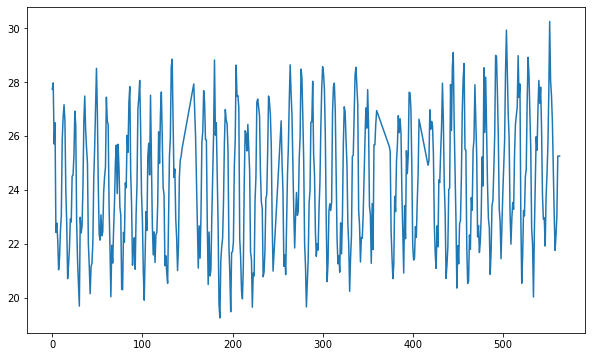

In [4]:
plt.figure(figsize = (10, 6))
plt.plot(df['Temperature'])

# Checking stationarity

In [5]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [7]:
adfuller_test(df['Temperature'])

ADF Test Statistic : -5.174338921539769
p-value : 9.917000822801659e-06
#Lags Used : 15
Number of Observations Used : 548
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Determining the values of p, d, q

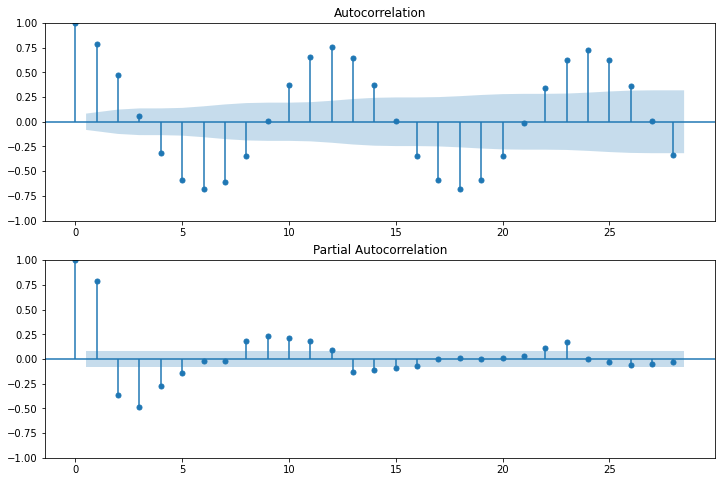

In [10]:
#plotting the graphs
fig = plt.figure(figsize = (12, 8))

ax1 = fig.add_subplot(211)
fig = plot_acf(df['Temperature'], ax= ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Temperature'], ax= ax2)

In [11]:
#using auto arima
stepwise_fit = auto_arima(df['Temperature'], start_p = 1, start_q = 1,
                          max_p = 8, max_q = 8,
                           seasonal = False, stationary = True,
                          trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2008.589, Time=2.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2579.702, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2042.090, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2229.936, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5210.950, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1863.280, Time=0.97 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1965.983, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1770.926, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1814.637, Time=0.28 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=1768.724, Time=1.00 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1775.830, Time=0.25 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=1768.194, Time=1.04 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1766.217, Time=0.49 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=1768.029, Time=1.00 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  564
Model:               SARIMAX(5, 0, 0)   Log Likelihood                -876.108
Date:                Mon, 27 Feb 2023   AIC                           1766.217
Time:                        10:59:49   BIC                           1796.562
Sample:                             0   HQIC                          1778.062
                                - 564                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.2650      0.973     15.692      0.000      13.358      17.172
ar.L1          0.7266      0.043     17.042      0.000       0.643       0.810
ar.L2          0.1676      0.050      3.377      0.001       0.070       0.265
ar.L3         -0.2238      0.050     -4.436      0.000      -0.323      -0.125
ar.L4         -0.1549      0.052     -2.956      0.003      -0.258      -0.052
ar.L5         -0.1414      0.045     -3.118      0.002      -0.230      -0.053
sigma2         1.3029      0.089     14.700      0.000       1.129       1.477
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.37
Prob(Q):                              0.89   Prob(JB):                         0.11
Heteroskedasticity (H):               0.93   Skew:                            -0.03
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

from auto arima we get p = 5, d =0, q = 0

In [18]:
#using iteration method
p = range(0,8)
q = range(0, 8)
d = range(0, 4)

In [17]:
order_final = []
r2_list = []

In [19]:
pdq_comb = list(itertools.product(p,d,q))

In [20]:
len(pdq_comb)

256

In [21]:
#we will use ARIMA as data is stationary
#we will predict the values for last 24 months
#Then we wil calculate R2_score for all pdq combinations
#we will find that pdq for which R2_score is max

for pdq in pdq_comb:
    try:
        model = ARIMA(df['Temperature'], order = pdq).fit()    
        pred = model.predict(start = 542)                                  
        r2 = r2_score(df['Temperature'][542:], pred)
        order_final.append(pdq)
        r2_list.append(r2)
    except:
        continue

In [22]:
df_results = pd.DataFrame({'Order':order_final, 'R2_score':r2_list})
df_results

,Order,R2_score
0,"(0, 0, 0)",-0.077793
1,"(0, 0, 1)",0.490559
2,"(0, 0, 2)",0.598278
3,"(0, 0, 3)",0.687184
4,"(0, 0, 4)",0.742869
...,...,...
250,"(7, 3, 3)",0.588408
251,"(7, 3, 4)",0.732237
252,"(7, 3, 5)",0.691917
253,"(7, 3, 6)",0.530228


In [24]:
df_results_final = df_results[df_results['R2_score'] == df_results['R2_score'].max()]
df_results_final

,Order,R2_score
130,"(4, 0, 2)",0.848673


From iteartin method we get p = 4, d = 0, q = 2

# Fitting the model

In [12]:
model = ARIMA(df['Temperature'], order = (5,0,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Temperature   No. Observations:                  564
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -876.104
Date:                Mon, 27 Feb 2023   AIC                           1766.208
Time:                        11:02:25   BIC                           1796.553
Sample:                             0   HQIC                          1778.053
                                - 564                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3887      0.077    316.168      0.000      24.238      24.540
ar.L1          0.7239      0.043     16.990      0.000       0.640       0.807
ar.L2          0.1677      0.050      3.378      0.001       0.070       0.265
ar.L3         -0.2224      0.050     -4.409      0.000      -0.321      -0.124
ar.L4         -0.1548      0.052     -2.952      0.003      -0.258      -0.052
ar.L5         -0.1437      0.045     -3.167      0.002      -0.233      -0.055
sigma2         1.3029      0.089     14.699      0.000       1.129       1.477
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.42
Prob(Q):                              0.93   Prob(JB):                         0.11
Heteroskedasticity (H):               0.93   Skew:                            -0.03
Prob(H) (two-sided):                  0.62   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

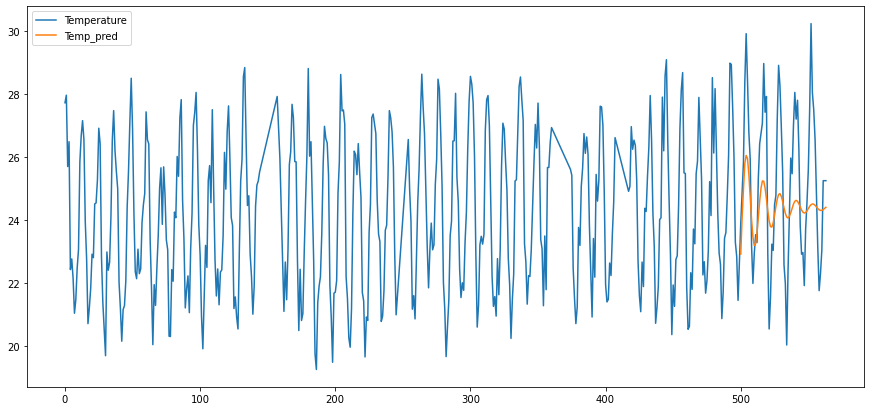

In [16]:
df['Temp_pred'] = model_fit.predict(start = 500, dynamic = True)
df[['Temperature', 'Temp_pred']].plot(figsize = (15, 7))

In [29]:
r2_score(df['Temperature'][500:], df['Temp_pred'][500:])

0.16689357032710983

The R2 score using (5,0,0) is 0.16

In [27]:
model2 = ARIMA(df['Temperature'], order = (4,0,2))
model_fit2 = model2.fit()
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Temperature   No. Observations:                  564
Model:                 ARIMA(4, 0, 2)   Log Likelihood                -816.048
Date:                Mon, 27 Feb 2023   AIC                           1648.096
Time:                        11:18:14   BIC                           1682.777
Sample:                             0   HQIC                          1661.634
                                - 564                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6515      0.125    196.967      0.000      24.406      24.897
ar.L1          2.2220      0.039     57.576      0.000       2.146       2.298
ar.L2         -1.6990      0.099    -17.219      0.000      -1.892      -1.506
ar.L3          0.2307      0.104      2.229      0.026       0.028       0.434
ar.L4          0.1498      0.044      3.370      0.001       0.063       0.237
ma.L1         -1.7198      0.014   -125.471      0.000      -1.747      -1.693
ma.L2          0.9953      0.014     68.677      0.000       0.967       1.024
sigma2         1.0554      0.076     13.922      0.000       0.907       1.204
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 5.03
Prob(Q):                              0.86   Prob(JB):                         0.08
Heteroskedasticity (H):               0.88   Skew:                             0.13
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

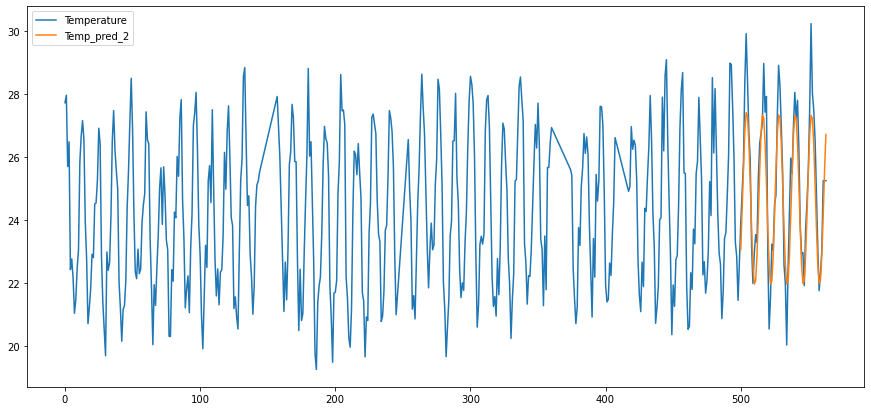

In [28]:
df['Temp_pred_2'] = model_fit2.predict(start = 500, dynamic = True)
df[['Temperature', 'Temp_pred_2']].plot(figsize = (15, 7))

the R2 score using (4,0,2) is 0.84

 On comparing we see that (4,0,2) provides much better estimation than (5,0,0)

# Future predictions

In [37]:
df['Month'] = [1 for i in range(len(df))]
df

,Temperature,Temp_pred_2,Month
0,27.73,NaN,1
1,27.97,NaN,1
2,25.70,NaN,1
3,26.49,NaN,1
4,22.42,NaN,1
...,...,...,...
559,22.30,22.084122,1
560,23.05,22.881207,1
561,25.25,24.152496,1
562,25.25,25.557037,1


In [36]:
futuremonth = [int(x) for x in range(1, 13)]
future_df = pd.DataFrame({'Month':futuremonth})
future_df

,Month
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [38]:
df_future = pd.concat([df, future_df], axis = 0)
df_future.reset_index(inplace = True, drop = True)
df_future

,Temperature,Temp_pred_2,Month
0,27.73,NaN,1
1,27.97,NaN,1
2,25.70,NaN,1
3,26.49,NaN,1
4,22.42,NaN,1
...,...,...,...
571,NaN,NaN,8
572,NaN,NaN,9
573,NaN,NaN,10
574,NaN,NaN,11


<AxesSubplot:>

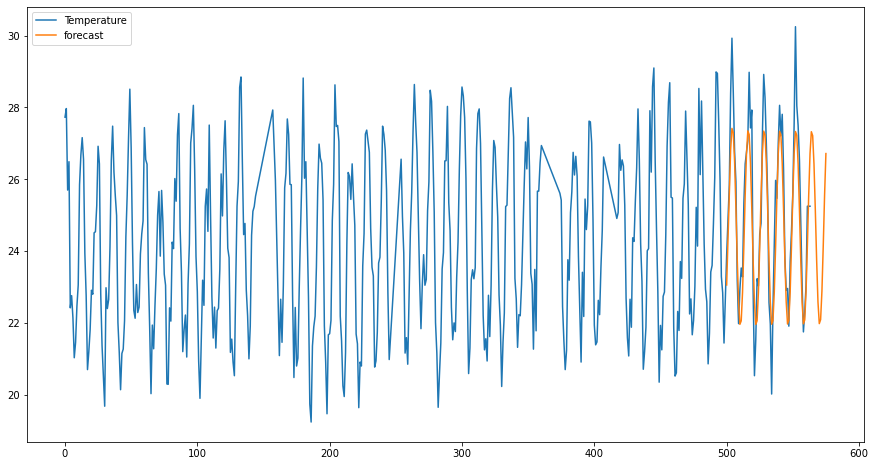

In [41]:
df_future['forecast']=model_fit2.predict(start= 500, end = 575, dynamic=True)
df_future[['Temperature','forecast']].plot(figsize=(15,8))

In [42]:
df_future

,Temperature,Temp_pred_2,Month,forecast
0,27.73,NaN,1,NaN
1,27.97,NaN,1,NaN
2,25.70,NaN,1,NaN
3,26.49,NaN,1,NaN
4,22.42,NaN,1,NaN
...,...,...,...,...
571,NaN,NaN,8,22.091949
572,NaN,NaN,9,22.889147
573,NaN,NaN,10,24.158419
574,NaN,NaN,11,25.559357
